<h1>Build a Logistic Regression Model with Scikit-learn?</h1>

<h3>What is Scikit-learn?</h3>

<p>scikit-learn is a python module that implements all of the basic machine learning algorithms, and allows us to build several different powerful models with just a few lines of code.</p>

<h3>Preparing the data for scikit-learn</h3>

<p>oftentimes before we use scikit-learn, we need to prepare our data first.</p>
<p>In this notebook we will take the titanic dataset as an example</p>


In [1]:
from IPython.display import display
import pandas as pd

df = pd.read_csv('data/titanic.csv')
display(df)

,Survived,Pclass,Sex,Age,Siblings/Spouses,Parents/Children,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
882,0,2,male,27.0,0,0,13.0000
883,1,1,female,19.0,0,0,30.0000
884,0,3,female,7.0,1,2,23.4500
885,1,1,male,26.0,0,0,30.0000


<p>First, we need to make all our columns numerical. Recall how to create the boolean column for Sex.</p>

In [2]:
df['male'] = df['Sex'] == 'male'
display(df[['male', 'Sex']])

,male,Sex
0,True,male
1,False,female
2,False,female
3,False,female
4,True,male
...,...,...
882,True,male
883,False,female
884,False,female
885,True,male


<p>Now, let’s take all the features and create a numpy array called X. We first select all the columns we are interested in and then use the values method to convert it to a numpy array.</p>

In [3]:
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
print(X)

[[3 True 22.0 1 0 7.25]
 [1 False 38.0 1 0 71.2833]
 [3 False 26.0 0 0 7.925]
 ...
 [3 False 7.0 1 2 23.45]
 [1 True 26.0 0 0 30.0]
 [3 True 32.0 0 0 7.75]]


<p>Now let’s take the target (the Survived column) and store it in a variable y.</p>

In [4]:
y = df['Survived'].values
print(y)

[0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1
 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0
 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0
 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 1
 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0 0 0
 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1
 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1 1 0
 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0
 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 1 1
 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1
 1 0 1 0 0 1 0 0 0 0 0 0 

<strong>It’s standard practice to call our 2d array of features X and our 1d array of target values y.</strong>

<h3>Build a Logistic Regression Model with Sklearn</h3>

<p>We start by importing the Logistic Regression model:</p>

In [5]:
from sklearn.linear_model import LogisticRegression

<p>All sklearn models are built as Python classes. We first instantiate the class</p>

In [6]:
model = LogisticRegression()

<p>The fit method is used for building the model. It takes two arguments: X (the features as a 2d numpy array) and y (the target as a 1d numpy array).</p>
<p>For simplicity, we will start by building a model that only uses the Fare and Age columns as features</p>

In [7]:
X = df[['Fare', 'Age']].values
y = df['Survived'].values

<p>Now we use the fit method to build the model.</p>

In [8]:
model.fit(X, y)

LogisticRegression()

<p>Fitting the model means using the data to choose a line of best fit. We can see the coefficients with the coef_ and intercept_ attributes.</p>

In [9]:
print(model.coef_, model.intercept_)

[[ 0.01615934 -0.0154909 ]] [-0.51035265]


<p>These values mean that the equation is as follows:</p>

In [10]:
print(f"0 = {model.coef_[0][0]}x + {model.coef_[0][1]}y + {model.intercept_[0]}")

0 = 0.016159344348631147x + -0.015490903473482814y + -0.5103526485501755


<p>Here’s the line drawn on the graph.</p>

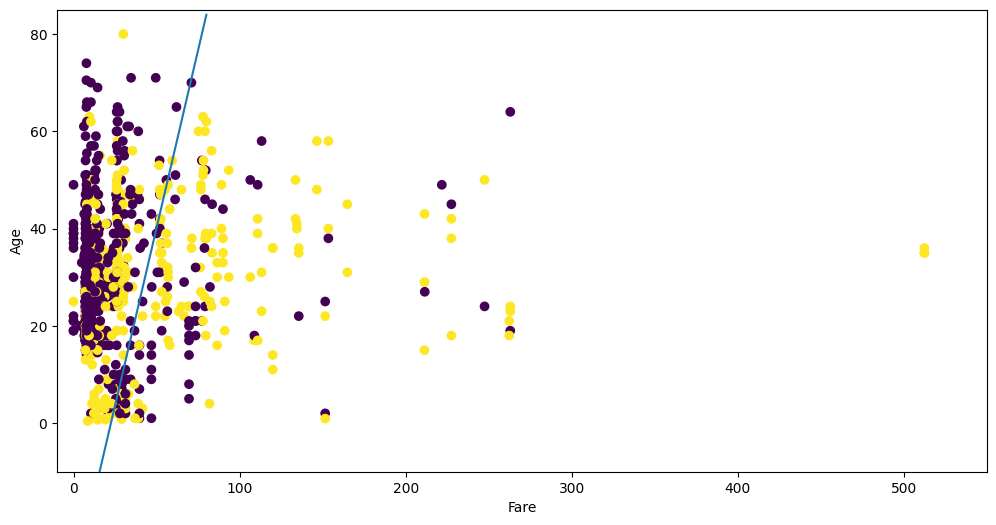

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.scatter(df['Fare'], df['Age'], c=df['Survived'])
plt.plot([0, 80], [((-1*model.intercept_[0])/(model.coef_[0][1])), ( (-1*model.intercept_[0])+(-1*model.coef_[0][0]*80) /(model.coef_[0][1]))])
plt.xlabel('Fare')
plt.ylabel('Age')
plt.xlim(-10, 550)
plt.ylim(-10, 85)
plt.show()

<strong>You can see it does a decent (but not great) job of splitting the yellow and purple points, so it might be a good idea to include more features than Fare and Age.</strong>

In [12]:
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
y = df['Survived'].values
model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

<h3>Make Predictions with Model</h3>
<p>Now we can use the predict method to make a predictions for the first passenger in the dataset.</p>

In [13]:
print(f"The first passenger in the dataset is: {X[0]}")
print(f"The prediction for the first passenger is {model.predict([X[0]])}")

The first passenger in the dataset is: [3 True 22.0 1 0 7.25]
The prediction for the first passenger is [0]


<strong>The predict method returns an array of 1’s and 0’s, where 1 means the model predicts the passenger survived and 0 means the model predicts the passenger didn’t survive.</strong>

<p>Let’s see what the model predicts for the first 5 rows of data and compare it to our target array.</p>

In [14]:
print(f"Actual targets of first 5 rows: {y[:5]}") 
print(f"Predicted targets of first 5 rows: {model.predict(X[:5])}") 

Actual targets of first 5 rows: [0 1 1 1 0]
Predicted targets of first 5 rows: [0 1 1 1 0]


<p>We see that it got all 5 correct!</p>

<h3>Score the Model</h3>

<p>We can get a sense of how good our model is by counting the number of datapoints it predicts correctly. This is called the accuracy score.</p>

In [15]:
y_pred = model.predict(X)

<p>Now we create an array of boolean values of whether or not our model predicted each passenger correctly.</p>

In [16]:
y == y_pred

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True, False,
       False,  True,  True, False,  True,  True, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True, False,  True,  True, False,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True, False,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True, False,
        True, False,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True, False,  True,  True,  True,  True, False,  True,
        True,  True, False,  True, False, False,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True, False,  True,
       False,  True,

<p>To get the number of these that are true, we can use the numpy sum method.</p>

In [17]:
print((y == y_pred).sum())

714


<p>This means that of the 887 datapoints, the model makes the correct prediction for 714 of them.</p>

<p>To get the percent correct, we divide this by the total number of passengers. We get the total number of passengers using the shape attribute.</p>

In [18]:
print((y == y_pred).sum() / y.shape[0])

0.8049605411499436


<strong>Thus the model’s accuracy is 80%. In other words, the model makes the correct prediction on 80% of the datapoints.</strong>

<p>We can also get the same result by using <strong>the score method</strong> from sklearn</p>

In [19]:
print(model.score(X, y))

0.8049605411499436


<p>The score method uses the model to make a prediction for X and counts what percent of them match y.</p>

<strong>However, there is a lot more to evaluating a model than this accuracy score.</strong>